In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%cd ..

c:\USC Assignments and projects\edos


In [5]:
all_data_dir = "data/raw/train_all_tasks.csv"
all_data_df = pd.read_csv(all_data_dir)
all_data_df.head()

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none


In [6]:
# convert text to lowercase
all_data_df['text'] = all_data_df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
all_data_df['text'].head()

#remove stopwords
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop = stopwords.words('english')

# all_data_df['text'] = all_data_df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
# all_data_df['text'].head()





#remove punctuation
all_data_df['text'] = all_data_df['text'].str.replace('[^\w\s]','')
all_data_df['text'].head()

C:\Users\vishw\AppData\Local\Temp\ipykernel_19344\1278219906.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  all_data_df['text'] = all_data_df['text'].str.replace('[^\w\s]','')


0                 damn this writing was pretty chaotic
1    yeah and apparently a bunch of misogynistic vi...
2               how the fuck is this woman still an mp
3    understand know youre right at same time i kno...
4        surprized they didnt stop and rape some women
Name: text, dtype: object

In [7]:
all_data_df['text_len'] = all_data_df['text'].apply(lambda x: len(x.split()))
all_data_df.head()

,rewire_id,text,label_sexist,label_category,label_vector,text_len
0,sexism2022_english-7358,damn this writing was pretty chaotic,not sexist,none,none,6
1,sexism2022_english-2367,yeah and apparently a bunch of misogynistic vi...,not sexist,none,none,18
2,sexism2022_english-3073,how the fuck is this woman still an mp,not sexist,none,none,9
3,sexism2022_english-14895,understand know youre right at same time i kno...,not sexist,none,none,25
4,sexism2022_english-4118,surprized they didnt stop and rape some women,not sexist,none,none,8


<AxesSubplot: >

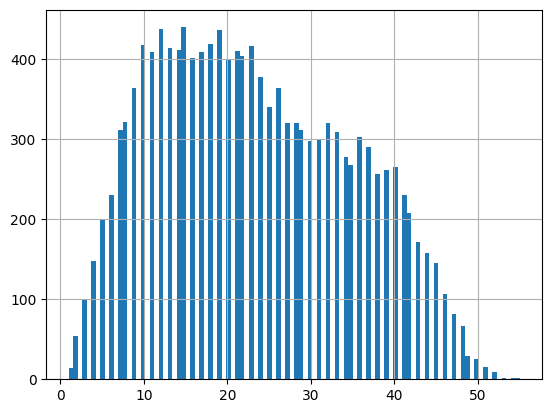

In [8]:
# text length distribution
all_data_df['text_len'].hist(bins=100)

<AxesSubplot: >

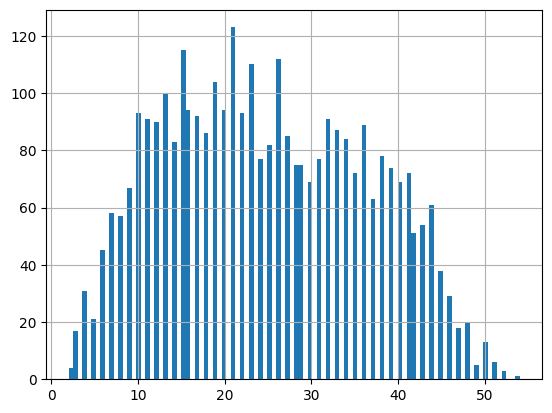

In [9]:
# text length distribution for sexist label
all_data_df[all_data_df['label_sexist'] == 'sexist']['text_len'].hist(bins=100)

<AxesSubplot: >

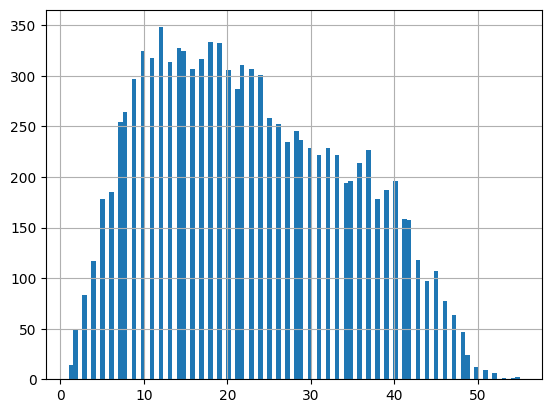

In [10]:
# text length distribution for non sexist label
all_data_df[all_data_df['label_sexist'] == 'not sexist']['text_len'].hist(bins=100)

<AxesSubplot: title={'center': 'Common words in text'}>

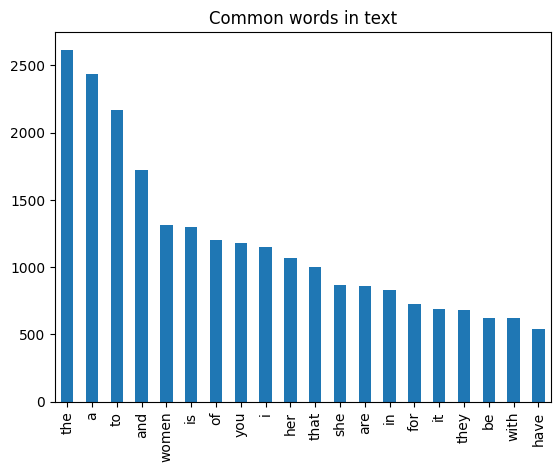

In [11]:
#plot common words in text for sexist label
freq = pd.Series(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'sexist']['text']).split()).value_counts()[:20]
freq.plot(kind='bar', title='Common words in text')

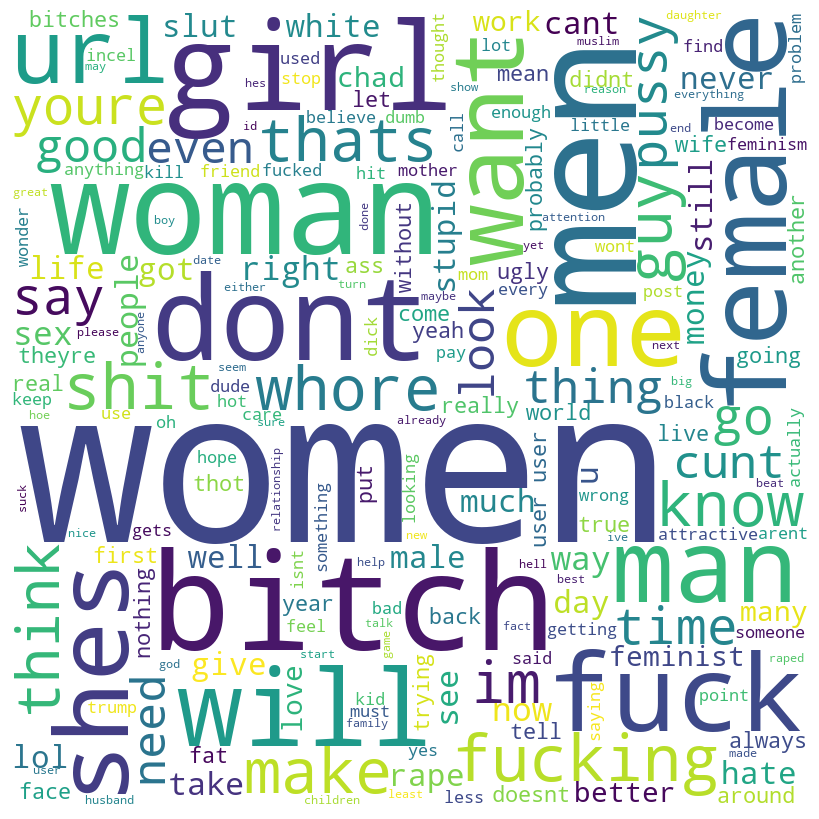

In [12]:
#word cloud for common words in text for sexist label
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', 
                min_font_size = 10).generate(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'sexist']['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



<AxesSubplot: title={'center': 'Common words in text'}>

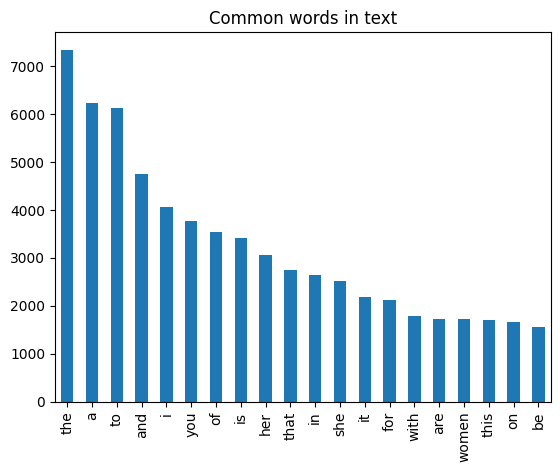

In [13]:
#plot common words in text for non sexist label
freq = pd.Series(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'not sexist']['text']).split()).value_counts()[:20] 
freq.plot(kind='bar', title='Common words in text')


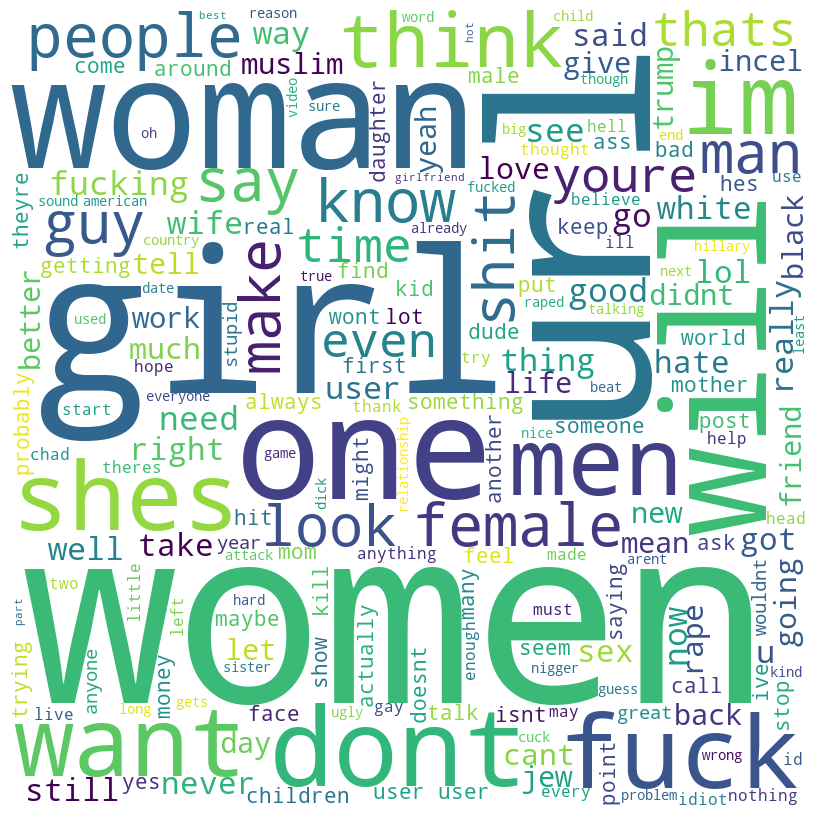

In [14]:
#word cloud for common words in text for non sexist label

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(all_data_df
                            [all_data_df['label_sexist'] == 'not sexist']['text']))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()




In [15]:
# get vocabulary of bert tokenizer 
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
vocab = tokenizer.get_vocab()
vocab = list(vocab.keys())
vocab = [x.lower() for x in vocab]
vocab = set(vocab)

# get vocabulary of text
text_vocab = set(' '.join(all_data_df['text']).split())
text_vocab = set([x.lower() for x in text_vocab])

# get vocabulary of text not in bert tokenizer
text_vocab_not_in_bert = text_vocab - vocab


c:\Users\vishw\Anaconda3\envs\edos\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
##lemmatization
import nltk
nltk.download('wordnet')
from textblob import Word
all_data_df['text'] = all_data_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
all_data_df['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                  damn this writing wa pretty chaotic
1    yeah and apparently a bunch of misogynistic vi...
2               how the fuck is this woman still an mp
3    understand know youre right at same time i kno...
4        surprized they didnt stop and rape some woman
Name: text, dtype: object

In [17]:
# get vocabulary of bert tokenizer 
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('vinai/bertweet-base')
vocab = tokenizer.get_vocab()
vocab = list(vocab.keys())
vocab = [x.lower() for x in vocab]
vocab = set(vocab)

# get vocabulary of text
text_vocab = set(' '.join(all_data_df['text']).split())
text_vocab = set([x.lower() for x in text_vocab])

# get vocabulary of text not in bert tokenizer
text_vocab_not_in_bert = text_vocab - vocab


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertweetTokenizer'. 
The class this function is called from is 'BertTokenizer'.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [18]:
len(text_vocab_not_in_bert)

20738

In [19]:
#get vocabulary of gpt2 tokenizer
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
vocab = tokenizer.get_vocab()
vocab = list(vocab.keys())
vocab = [x.lower() for x in vocab]
vocab = set(vocab)

Downloading: 100%|██████████| 1.04M/1.04M [00:00<00:00, 2.13MB/s]
c:\Users\vishw\Anaconda3\envs\edos\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\vishw\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Downloading: 100%|██████████| 456k/456k [00:00<00:00, 1.14MB/s]
Downloadi

In [23]:
text_vocab_not_in_gpt = text_vocab - vocab

In [25]:
len(text_vocab_not_in_gpt)

17051